# **ЗАДАНИЕ 4. МОДЕЛИРОВАНИЕ ТРЕНДА НА ОСНОВЕ КРИВЫХ РОСТА**

Постройте модель тренда, описывающую ряд данных по ценам на материал 1. Рассчитайте показатели точности и адекватности построенной модели. Дайте точечный и интервальный прогнозы на 1 год вперёд по построенной модели.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from math import sqrt
from pandas import concat
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

**1.	Прочитайте данные по ценам на материал 1 и приведите их к виду, пригодному для дальнейшего анализа (см. пп.1-10 Задания 1).**

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

In [ ]:
my_data = data.iloc[0:2,2:].T.rename(columns={0: 'Date', 1: 'Value'}).set_index('Date')
my_data.dtypes
#iloc[0:2,2:]                             - нарезал нужные строки и столбцы
#.T                                       - поверхул всё, т.е. транспонировал
#.rename(columns={0: 'Date', 1: 'Value'}) - поменял названия столбцов
# .set_index('Date')                      - сделал столбец с датами индексом

Value    object
dtype: object

In [ ]:
my_data['Value'] = my_data['Value'].astype(float)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [ ]:
my_data.sample(4)

,Value
Date,
2007-02-01,23.89
2010-10-01,45.18
2010-02-01,39.68
2009-12-01,37.74


**2.	Убедитесь в том, что Вы работаете с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze(). Дайте ему название series.**

In [ ]:
series=my_data.squeeze()
series

**3.	Посмотрите на возможность построения линейного тренда визуально с помощью функции regplot(x=x, y=y, data= data) из модуля seaborn. В качестве x возьмите номера наблюдений, а y – значения цены на материал 1. Прокомментируйте результат.**

In [ ]:
y=series.values

In [ ]:
t=np.arange(1,len(y)+1)


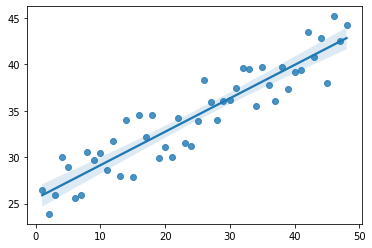

In [ ]:
sns.regplot(x=t, y=y, data=series)
# синий диапазон - это граица случайных колебаний

**4.	Разделите исходные данные на обучающий и тестовый набор в пропорции 80%:20%. Для этого создайте переменную y, в которую запишите значения временного ряда, обратившись к параметру values. Затем создайте переменную train, содержащую обучающую выборку, которая составляет 80% от количества наблюдений, и переменную test, содержащую тестовый набор из 20% выборки. Выведите на экран объем обучающей и тестовой выборки.**

In [ ]:
y=series.values

In [ ]:
train_size=int(len(y)*0.8)
train_size

38

In [ ]:
# разбиваем данные в соотношении 80% к 20% - это для оси Y (т.е. получаем 2 набора данных)
y_train, y_test=y[0:train_size], y[train_size:len(y)]

In [ ]:
# y_train - это ось Y для графика тренировки, это набор данных обучающе выборки

**6.	Поместите в переменную t_train номера наблюдений обучающего набора, воспользовавшись функцией arange() из модуля numpy. Выведите на экран содержимое t_train.**

In [ ]:
x_train =np.arange(1, len(y_train)+1) # это ось X для графика тренировки

In [ ]:
x_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [ ]:
y_train

array([26.45, 23.89, 25.95, 30.03, 28.96, 25.58, 25.96, 30.56, 29.67,
       30.46, 28.6 , 31.73, 28.  , 33.99, 27.87, 34.49, 32.22, 34.56,
       29.87, 31.09, 30.06, 34.21, 31.57, 31.18, 33.85, 38.27, 35.92,
       34.01, 36.  , 36.2 , 37.5 , 39.62, 39.51, 35.49, 39.69, 37.74,
       36.08, 39.68])

In [ ]:
len(x_train),len(y_train)

(38, 38)

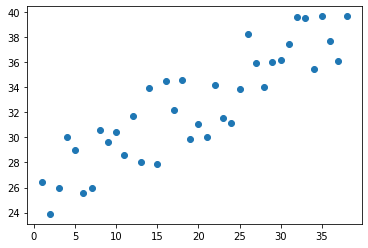

In [ ]:
plt.scatter(x_train,y_train)
#plt.scatter((0,38),coef)
plt.show()

**7.	На основе переменной t_train, которая выступает в качестве факторного признака, и переменной y_train с ценами на материал 1 из обучающего набора в качестве результативного признака обучите полином первой степени, воспользовавшись функцией polyfit() из модуля numpy. Результат запишите в переменную coef. Выведите на экран полученные коэффициенты модели.**

Метод, который работает позади метода полифита, называется обычным методом наименьших квадратов.

In [ ]:
coef=np.polyfit(x_train,y_train, deg=1)
coef # первое число - значение при факторе, второе - свободный член

array([ 0.35096728, 25.69587482])

# **____________________ВСТАВКА___________________________**

**РАЗЪЯСНЕНИЕ:** значения coef - это значения свободных членов для уравнения прямой

**у = 0.35096728 * х + 25.69587482**

**в уравнении у = 0.35096728 * х + 25.69587482 находим Y через X методом numpy**

In [ ]:
predict = np.poly1d(coef)
x_value = 38
predict(x_test)

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

**Шаг 6: точность модели**

Мы также можем проверить точность модели, дает ли она правильные результаты или нет. Точность модели можно рассчитать с помощью R-квадрата (R2). Значение R-квадрата (R2) находится между 0 и 1. Результат, близкий к 1, показывает, что точность модели высока. Итак, проверим точность приведенной выше модели. Мы импортируем другую библиотеку, sklearn, как показано ниже:

In [ ]:
x_test=np.arange(len(y_train)+1, len(y)+1)
x_test

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
y_test

array([37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01, 45.18, 42.49,
       44.2 ])

In [ ]:
len(x_test),len(y_test)

(10, 10)

In [ ]:
from sklearn.metrics import r2_score # получилось, но предсказывает фигово
r2_score(y_test,predict(x_test))

0.35174996430045324

**Шаг 7: Построение модели**

Построение графика — это метод визуального просмотра линии, подобранной модели, на точках данных. Это дает четкое изображение модели.

In [ ]:
i = 1,38 # это крайние значения x_train

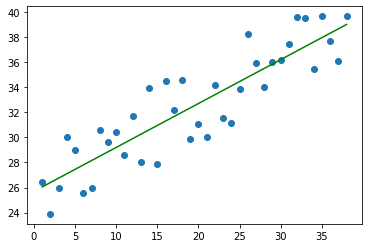

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(i,predict(i),c='g')
plt.show()
# i - это крайние значения x_train, predict(i) - пропускаем i через уравнение y(уравнение прямой, см. выше) с коэффициентами найденными с помощью полинома первой степени coef

# **____________________КОНЕЦ___________________________**

**8.	Поместите в переменную t_test номера наблюдений тестового набора, воспользовавшись функцией arange() из модуля numpy. Выведите на экран содержимое t_ test.**

In [ ]:
x_test=np.arange(len(y_train)+1, len(y)+1)
x_test

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

**9.	Найдите расчетные значения цены на материал 1 по модели линейного тренда, воспользовавшись найденными коэффициентами: coef[0] – коэффициент при факторном признаке, coef[1] – свободный член. Выведите на экран полученный результат.**

**МОДЕЛЬ ЛИНЕЙНОГО ТРЕНДА**

In [ ]:
predict = np.poly1d(coef) # это метод, что нашел я
y_pred = predict(x_test) # вставили значения по оси Х в наше уравнение и получили значение Y тестовой выборки
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

In [ ]:
y_pred=coef[0]*x_test+coef[1] #
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

**10.	Оцените точность модели на тестовой выборке на основе коэффициента детерминации, воспользовавшись функцией r2_score(y_test, y_pred) из модуля sklearn.metrics. Запишите результат.**

In [ ]:
R2=r2_score(y_test,y_pred) # значение плохое
R2

0.35174996430045324

**11.	Аналогично найдите расчетные значения цены на материал 1 по модели линейного тренда с помощью функции linregress(t_train, y_train) из модуля scipy.stats. Рассчитайте коэффициент детерминации для тестового набора. Сравните полученный результат с предыдущим из п.9.**

**МОДЕЛЬ ЛИНЕЙНОГО ТРЕНДА**

In [ ]:
coef=linregress(x_train, y_train)
coef

LinregressResult(slope=0.3509672830725461, intercept=25.69587482219062, rvalue=0.8844672231847377, pvalue=1.790821115944336e-13, stderr=0.030858907019685272)

In [ ]:
y_pred=coef[0]*x_test+coef[1]
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

In [ ]:
R2=r2_score(y_test,y_pred)
R2

0.351749964300451

**12.	Обучите на обучающем наборе данных модель линейного тренда на основе функций LinearRegression().fit() из модуля sklearn.linear_model. Выведите на экран полученные коэффициенты модели, воспользовавшись параметром coef_ для вывода коэффициента при номере наблюдения и параметром intercept_ - для свободного члена. Не забудьте перед этим превратить строку в переменной t_train в столбец, воспользовавшись функцией reshape(-1,1).**

**МОДЕЛЬ ЛИНЕЙНОЙ РЕГРЕССИИ**

In [ ]:
x_train=x_train.reshape(-1,1)

In [ ]:
model=LinearRegression().fit(x_train, y_train)

In [ ]:
model.coef_ # см. п.7,  проще говоря (коэффициент при номере наблюдения) это значение 'a' в
            # в формуле у = aх — b


array([0.35096728])

In [ ]:
model.intercept_ # см. п.7,  проще говоря (коэффициент при номере наблюдения) это значение 'b' в
                 # в формуле у = aх — b

25.695874822190618

**получим: у = 0.35096728 * х — 25.69587482**

**13.	Найдите расчетные значения цены на материал 1 для тестового набора данных по модели линейного тренда, воспользовавшись функцией predict(). Выведите на экран полученный результат. Не забудьте перед этим превратить строку в переменной t_test в столбец, воспользовавшись функцией reshape(-1,1).**

In [ ]:
t_test =x_test.reshape(-1,1)

In [ ]:
y_pred=model.predict(t_test)
y_pred

array([39.38359886, 39.73456615, 40.08553343, 40.43650071, 40.78746799,
       41.13843528, 41.48940256, 41.84036984, 42.19133713, 42.54230441])

**14.	Оцените точность модели на тестовой выборке на основе коэффициента детерминации, воспользовавшись функцией r2_score(y_test, y_pred) из модуля sklearn.metrics. Сравните результат с полученными ранее.**

In [ ]:
R2=r2_score(y_test, y_pred)
R2

0.3517499643004516

**15.	Оцените точность модели на тестовой выборке на основе средней абсолютной ошибки (MAE), воспользовавшись функцией mean_absolute_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

1.6781621621621639

**16.	Оцените точность модели на тестовой выборке на основе средней квадратичной ошибки (MSE), воспользовавшись функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MSE

4.317812626034734

**17.	Оцените точность модели на тестовой выборке на основе корня квадратного из среднеквадратичной ошибки (RMSE) для всех сделанных прогнозов, воспользовавшись функцией sqrt() из модуля math и функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics.**

In [ ]:
RMSE=sqrt(MSE)
RMSE

2.077934702062299

**18.	Рассчитайте прогнозные значения на тестовой выборке по базовой модели, которая в качестве прогноза выдает прошлое значение. Результат запишите в переменную y_pred.**

In [ ]:
y_pred=y[len(y_train)-1:len(y)-1]
y_pred

array([39.68, 37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01, 45.18,
       42.49])

In [ ]:
MSE=mean_squared_error(y_test, y_pred) # ошибка увеличилась
MSE

12.22468000000001

**19.	Оцените точность базовой модели на тестовой выборке на основе средней квадратичной ошибки (MSE), воспользовавшись функцией mean_squared_error(y_test, y_pred) из модуля sklearn.metrics. Сравните результат с аналогичным показателем линейного тренда.**

**ОБУЧАЕМ НА ВСЕХ ДАННЫХ ЛУЧШУЮ МОДЕЛЬ**

In [ ]:
t=np.arange(1,len(y)+1) #
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
t=t.reshape(-1,1) # превращаем строчку в столбец
t

**20.	Обучите на всех данных лучшую модель. Запишите ее уравнение.**

In [ ]:
model=LinearRegression().fit(t,y) # создаем объект и обучаем

In [ ]:
model.coef_

array([0.36008142])

In [ ]:
model.intercept_

25.542171985815607

In [ ]:
y_pred=model.predict(t) # обученная на наших данных модель спрогнозировала ниши данные
                        # по уравнению y=ax-b, где a = model.coef_ и b = model.intercept_
y_pred

array([25.9022534 , 26.26233482, 26.62241623, 26.98249765, 27.34257906,
       27.70266048, 28.06274189, 28.42282331, 28.78290473, 29.14298614,
       29.50306756, 29.86314897, 30.22323039, 30.5833118 , 30.94339322,
       31.30347463, 31.66355605, 32.02363747, 32.38371888, 32.7438003 ,
       33.10388171, 33.46396313, 33.82404454, 34.18412596, 34.54420737,
       34.90428879, 35.26437021, 35.62445162, 35.98453304, 36.34461445,
       36.70469587, 37.06477728, 37.4248587 , 37.78494011, 38.14502153,
       38.50510295, 38.86518436, 39.22526578, 39.58534719, 39.94542861,
       40.30551002, 40.66559144, 41.02567285, 41.38575427, 41.74583569,
       42.1059171 , 42.46599852, 42.82607993])

**21.	Найдите расчетные значения по модели для всех данных. Рассчитайте ошибки модели для всех данных. Поместите столбец ошибок 'Error' в таблицу исходных данных. Выведите на экран первые 5 наблюдений.**

In [ ]:
my_data['Error']=y-y_pred # добавляем столбец в котором выводим разницу между фактическим значением и расчетным
my_data.sample(10)

,Value,Error
Date,,
2007-12-01,31.73,1.866851
2008-04-01,34.49,3.186525
2010-08-01,42.84,1.454246
2009-10-01,35.49,-2.294940
2010-04-01,39.21,-0.735429
2009-07-01,37.50,0.795304
2008-06-01,34.56,2.536363
2007-01-01,26.45,0.547747
2009-12-01,37.74,-0.765103


**22.	Постройте линейный график ошибок, воспользовавшись функцией plot() и командой pyplot.show() из модуля matplotlib. Прокомментируйте результат.**

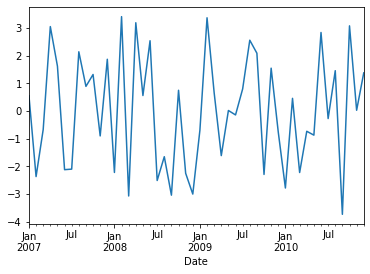

In [ ]:
my_data.Error.plot() # график говорит о том что среднее = 0 , это хорошо
plt.show()

**23.	Выведите на экран описательные статистики ошибок, воспользовавшись функцией describe(). Прокомментируйте результат.**

In [ ]:
my_data.Error.describe()

count    4.800000e+01
mean    -2.146431e-15
std      2.056806e+00
min     -3.735836e+00
25%     -2.107722e+00
50%      1.973422e-02
75%      1.563089e+00
max      3.406688e+00
Name: Error, dtype: float64

**24.	Постройте для ошибок гистограмму на основе функции hist(), ядерную оценку плотности на основе функции plot(kind='kde'), Q-Q график на основе функции qqplot() из модуля statsmodels.graphics.gofplots, а также функцией show() из matplotlib.pyplot. Прокомментируйте результат.**

In [ ]:
my_data.Error.hist()
plt.show()

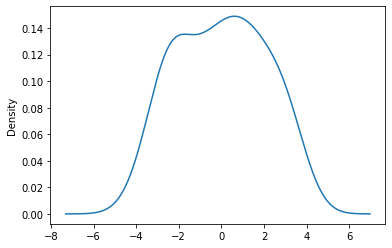

In [ ]:
my_data.Error.plot(kind='kde')
plt.show()

# **график квантиля квантиля**

**здесь прямая соответствует норманому распределению и чем ближе значения ряда расположены к этой прямой тем они нормальней**

In [ ]:
# !!!!!!!! qqplot(price_1,price_2) - этот пример показывает, что можно на одном графике вывести два ряда данных
# например данные за 2007 и 2011 годы и посмотреть соотвествуют ли эти данные в целом нормальному распределению

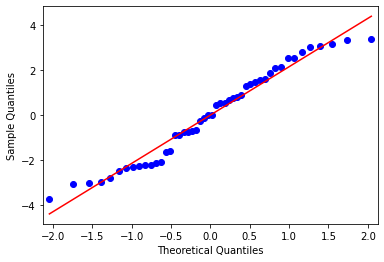

In [ ]:
qqplot(my_data.Error, line='r') #
plt.show()

**25.	Оцените адекватность модели линейного тренда на основе теста Дарбина-Уотсона, воспользовавшись функцией durbin_watson() из модуля statsmodels.stats.stattools применительно к остаткам модели. Прокомментируйте результат.**


**теста Дарбина-Уотсона** - определяет наличие автокорреляции в остатках

In [ ]:
d=durbin_watson(my_data.Error)
d

2.4215967803259413

**модель адекватная**

вывод: **ИДЕАЛЬНО**, т.е. нет автокорреляции, т.к. близко к 2, если бы было 0, то положительная автокорреляция, если 4 - то отрицательная

**но все же недостаточно, попали в зону неопределенности**

**если d > 2, то нужно:**

In [ ]:
4-d

1.5784032196740587

dl=1.5, du=1.59

**26.	Постройте для ошибок линейного тренда коррелограмму, воспользовавшись функцией autocorrelation_plot() из модуля pandas.plotting. Прокомментируйте результат.**

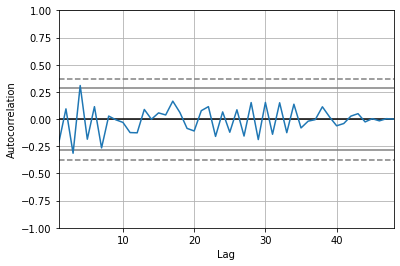

In [ ]:
autocorrelation_plot(my_data.Error) # а здесь модель адекватная
plt.show()

**27.	Рассчитайте среднее квадратичное отклонение, воспользовавшись функцией sem() из модуля scipy.stats. Запишите результат в переменную sigma и выведите его на экран.**

In [ ]:
sigma =scipy.stats.sem(y)
sigma

0.7858586031149843

**28.	Рассчитайте двусторонний t критерий Стьюдента для существующего объема выборки и 95% достоверности результата (confidence). Воспользуйтесь функцией t.ppf((1 + confidence) / 2., len(y)-1) из модуля scipy.stats. Запишите результат в переменную tstu и выведите его на экран.**

**t-критерий стюдента**

In [ ]:
confidence=0.95
tstu =scipy.stats.t.ppf((1+confidence)/2.,len(y)-1)
tstu

2.0117405104757546

# **Выполняем прогноз для последующих 12 месяцев**

**29.	Сгенерируйте номера наблюдений для прогнозного интервала, равного 12 месяцев. Запишите результат в переменную t_new и выведите его на экран.**

In [ ]:
t_new =np.arange(len(y)+1, len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
t_new =t_new.reshape(-1,1)

**30.	Найдите прогнозные значения цены на материал 1 на год вперед (точечный прогноз). Запишите результат в переменную y_new и выведите его на экран.**

In [ ]:
y_new =model.predict(t_new) # model - эту модель мы
y_new

array([43.18616135, 43.54624276, 43.90632418, 44.26640559, 44.62648701,
       44.98656843, 45.34664984, 45.70673126, 46.06681267, 46.42689409,
       46.7869755 , 47.14705692])

**31.	Рассчитайте верхнюю границу прогнозного интервала**, воспользовавшись формулой: y_up=y_new+tstu* igma.Выведите результат на экран.

In [ ]:
y_up=y_new+tstu*sigma # выисляем верхнюю границу = значение + t критерий * на СКО(среднеквадрати́чное отклоне́ние )
y_up

array([44.76710493, 45.12718635, 45.48726777, 45.84734918, 46.2074306 ,
       46.56751201, 46.92759343, 47.28767484, 47.64775626, 48.00783767,
       48.36791909, 48.72800051])

**32.	Рассчитайте нижнюю границу прогнозного интервала**, воспользовавшись формулой: y_down=y_new-tstu*sigma. Выведите результат на экран.

In [ ]:
y_down=y_new-tstu*sigma # выисляем верхнюю границу = значение - t критерий * на СКО(среднеквадрати́чное отклоне́ние )
y_down

array([41.60521776, 41.96529918, 42.32538059, 42.68546201, 43.04554342,
       43.40562484, 43.76570625, 44.12578767, 44.48586908, 44.8459505 ,
       45.20603192, 45.56611333])

**33.	Нанесите на одну диаграмму фактические значения, значения по модели, точечный и интервальный прогнозы, воспользовавшись функциями figure(), scatter(), plot(), xlabel(), ylabel(), legend() и show() из модуля matplotlib.pyplot.**

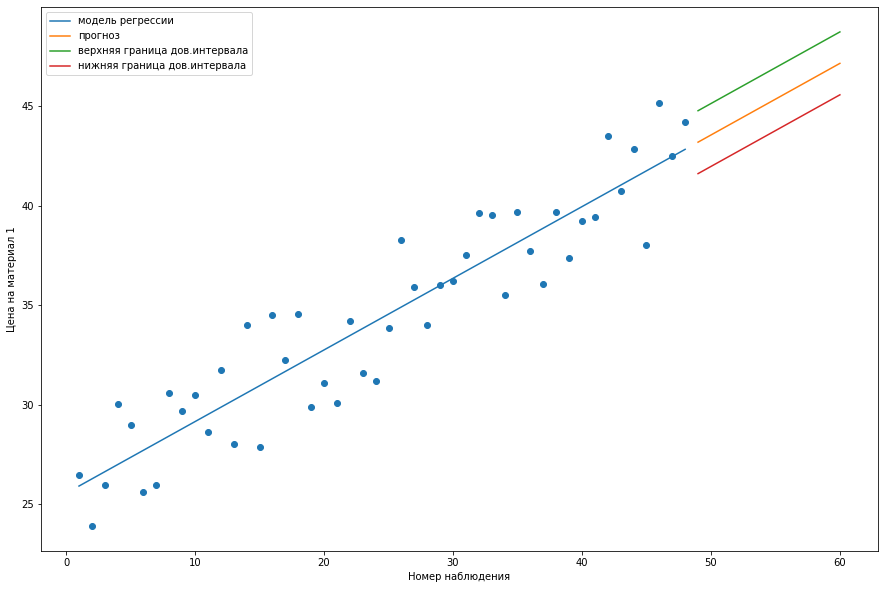

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(t,y)

plt.plot(t, y_pred)
plt.plot(t_new, y_new)
plt.plot(t_new, y_up)
plt.plot(t_new, y_down)

plt.xlabel('Номер наблюдения')
plt.ylabel('Цена на материал 1')
plt.legend(['модель регрессии', 'прогноз', 'верхняя граница дов.интервала', 'нижняя граница дов.интервала'])

plt.show()

**зеленое и красное - это границы прогнозного интервала, с вероятностью 95 % прогнозируемое значение попадет сюда**